# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# if you are using google colab
from google.colab import files
files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me.csv


{'daily-minimum-temperatures-in-me.csv': b'Date,Temperature\n1981-01-01,20.7\n1981-01-02,17.9\n1981-01-03,18.8\n1981-01-04,14.6\n1981-01-05,15.8\n1981-01-06,15.8\n1981-01-07,15.8\n1981-01-08,17.4\n1981-01-09,21.8\n1981-01-10,20\n1981-01-11,16.2\n1981-01-12,13.3\n1981-01-13,16.7\n1981-01-14,21.5\n1981-01-15,25\n1981-01-16,20.7\n1981-01-17,20.6\n1981-01-18,24.8\n1981-01-19,17.7\n1981-01-20,15.5\n1981-01-21,18.2\n1981-01-22,12.1\n1981-01-23,14.4\n1981-01-24,16\n1981-01-25,16.5\n1981-01-26,18.7\n1981-01-27,19.4\n1981-01-28,17.2\n1981-01-29,15.5\n1981-01-30,15.1\n1981-01-31,15.4\n1981-02-01,15.3\n1981-02-02,18.8\n1981-02-03,21.9\n1981-02-04,19.9\n1981-02-05,16.6\n1981-02-06,16.8\n1981-02-07,14.6\n1981-02-08,17.1\n1981-02-09,25\n1981-02-10,15\n1981-02-11,13.7\n1981-02-12,13.9\n1981-02-13,18.3\n1981-02-14,22\n1981-02-15,22.1\n1981-02-16,21.2\n1981-02-17,18.4\n1981-02-18,16.6\n1981-02-19,16.1\n1981-02-20,15.7\n1981-02-21,16.6\n1981-02-22,16.5\n1981-02-23,14.4\n1981-02-24,14.4\n1981-02-25,18.5\

In [18]:
!

/content


In [0]:
df = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv',index_col='Date')


### Print the data
- First 5 rows only

In [23]:
print(df.head())
#df.plot()

            Temperature
Date                   
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8


### Set index column
- Set the DataFrame index using "Date" column

In [0]:
#already set while reading

## Question 2

### Check the total count of null values in the data

In [24]:
# Null Values?
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
df.dropna(inplace=True)

## Question 3

### Describe your dataframe
- use describe() method

In [26]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

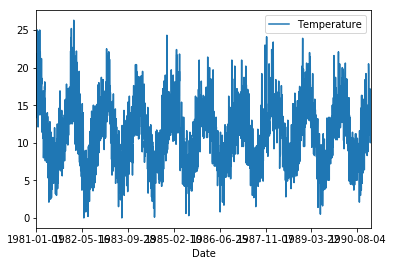

In [27]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd517613080>]],
      dtype=object)

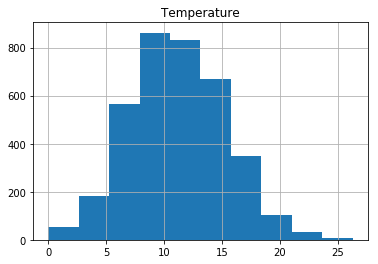

In [28]:
df.hist(bins=10)

### Check minimum and maximum temperature
- use min() and max() methods

In [29]:
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [43]:
print(len(df))
train_size = int(len(df) * 0.75)
print (train_size)
test_size = len(df) - train_size
print (test_size)
train= df.head(train_size)
test = df.tail(test_size)
print('train: {}\ntest: {}'.format(len(train), len(test)))
print(train.tail())
print(test.head())

3650
2737
913
train: 2737
test: 913
            Temperature
Date                   
1988-06-26          8.0
1988-06-27         10.0
1988-06-28          6.7
1988-06-29          9.4
1988-06-30          9.3
            Temperature
Date                   
1988-07-01          6.0
1988-07-02          5.8
1988-07-03          4.9
1988-07-04          5.0
1988-07-05          8.4


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
print('train Min', np.min(scaled))
print('train Max', np.max(scaled))
scaled_test = scaler.transform(test)
print('test Min', np.min(scaled))
print('test Max', np.max(scaled))

train Min 0.0
train Max 1.0
test Min 0.0
test Max 1.0


### Print scaled train and test data
- print only first 5 values

In [48]:
print ("---scaled_train-----")
pd.DataFrame(scaled_train).head()


---scaled_train-----


,0
0,0.787072
1,0.680608
2,0.714829
3,0.555133
4,0.600760


In [49]:
print ("---scaled_test-----")
pd.DataFrame(scaled_test).head()

---scaled_test-----


,0
0,0.228137
1,0.220532
2,0.186312
3,0.190114
4,0.319392


## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
#import numpy as np
#def create_seq_data(data, lookback=1):
#  X, y = list(), list()
# 
# for day in range((len(data)-lookback)):
#   X.append(data[day: day+lookback, 0])
#   y.append(data[day+lookback, 0])
# return np.array(X), np.array(y)

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [64]:
look_back = 1
X_train, y_train = create_dataset(scaled_train, look_back)
X_test, y_test = create_dataset(scaled_test, look_back)

2737 1
0
X 0 to 1
[0.78707224]
Y 1
0.6806083650190113
1
X 1 to 2
[0.68060837]
Y 2
0.714828897338403
2
X 2 to 3
[0.7148289]
Y 3
0.5551330798479087
3
X 3 to 4
[0.55513308]
Y 4
0.6007604562737643
4
X 4 to 5
[0.60076046]
Y 5
0.6007604562737643
5
X 5 to 6
[0.60076046]
Y 6
0.6007604562737643
6
X 6 to 7
[0.60076046]
Y 7
0.6615969581749048
7
X 7 to 8
[0.66159696]
Y 8
0.8288973384030418
8
X 8 to 9
[0.82889734]
Y 9
0.7604562737642585
9
X 9 to 10
[0.76045627]
Y 10
0.6159695817490494
10
X 10 to 11
[0.61596958]
Y 11
0.5057034220532319
11
X 11 to 12
[0.50570342]
Y 12
0.6349809885931559
12
X 12 to 13
[0.63498099]
Y 13
0.8174904942965779
13
X 13 to 14
[0.81749049]
Y 14
0.9505703422053232
14
X 14 to 15
[0.95057034]
Y 15
0.7870722433460076
15
X 15 to 16
[0.78707224]
Y 16
0.7832699619771863
16
X 16 to 17
[0.78326996]
Y 17
0.9429657794676806
17
X 17 to 18
[0.94296578]
Y 18
0.6730038022813688
18
X 18 to 19
[0.6730038]
Y 19
0.5893536121673003
19
X 19 to 20
[0.58935361]
Y 20
0.6920152091254752
20
X 20 to 21


### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Print shape of data
- print shape of X_train and X_test

In [66]:
print(X_train.shape)
print(X_test.shape)

(2735, 1, 1)
(911, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [67]:
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 5s - loss: 0.0226
Epoch 2/50
 - 4s - loss: 0.0137
Epoch 3/50
 - 4s - loss: 0.0120
Epoch 4/50
 - 4s - loss: 0.0113
Epoch 5/50
 - 4s - loss: 0.0108
Epoch 6/50
 - 4s - loss: 0.0105
Epoch 7/50
 - 4s - loss: 0.0105
Epoch 8/50
 - 4s - loss: 0.0104
Epoch 9/50
 - 4s - loss: 0.0103
Epoch 10/50
 - 4s - loss: 0.0103
Epoch 11/50
 - 4s - loss: 0.0102
Epoch 12/50
 - 4s - loss: 0.0103
Epoch 13/50
 - 4s - loss: 0.0102
Epoch 14/50
 - 4s - loss: 0.0102
Epoch 15/50
 - 4s - loss: 0.0102
Epoch 16/50
 - 4s - loss: 0.0101
Epoch 17/50
 - 4s - loss: 0.0101
Epoch 18/50
 - 4s - loss: 0.0102
Epoch 19/50
 - 4s - loss: 0.0101
Epoch 20/50
 - 4s - loss: 0.0101
Epoch 21/50
 - 4s - loss: 0.0101
Epoch 22/50
 - 4s - loss: 0.0100
Epoch 23/50
 - 4s - loss: 0.0102
Epoch 24/50
 - 4s - loss: 0.0101
Epoch 25/50
 - 4s - loss: 0.0101
Epoch 26/50
 - 4s - loss: 0.0101
Epoch 27/50
 - 4s - loss: 0.0100
Epoch 28/50
 - 4s - loss: 0.0101
Epoch 29/50
 - 4s - loss: 0.0100
Epoch 30/50
 - 4s - loss: 0.0101
Epoch 31/50
 - 4s -

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
#already done in preious step

### summarize your model
- use summary() method

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_2 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [0]:
#done in preious step

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)


### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=batch_size)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [73]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))


Train Score: 2.62 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [74]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.57 RMSE
